# <center><font color="pink">**Install and Import Library**</font></center>

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus  import stopwords

!pip install Sastrawi
!pip install swifter
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

import matplotlib.pyplot as plt

# <center><font color="pink">**Import CSV**</font></center>

In [ ]:
# Menyimpan path dari file data ke dalam variabel dataset
dataset = "/content/dataset.csv"
# Membaca File CSV ke DataFrame
df = pd.read_csv(dataset, sep=',', encoding='latin-1', on_bad_lines='skip')
# Melihat sedikit bagian atas data
df.head()

,conversation_id_str,created_at,full_text,username;;;;;;;;;;;;
0,1710806470810630000,Sat Oct 07 23:59:52 +0000 2023,@rgone360 Kena beli sorg lg wing back january ...,luqmanha14;;;;;;;;;;;;
1,1710652778232920000,Sat Oct 07 23:59:52 +0000 2023,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...,AsySyaiful01;;;;;;;;;;;;
2,1710628935221080000,Sat Oct 07 23:59:50 +0000 2023,@kompascom Bangsaatt .... Hamas itu bukan tero...,haenesarajawane;;;;;;;;;;;;
3,1710807167656470000,Sat Oct 07 23:59:48 +0000 2023,Mana yg sokong Ukraine tempoh hari? Nahhh seka...,iammco;;;;;;;;;;;;
4,1710647444512570000,Sat Oct 07 23:59:46 +0000 2023,@tempodotco AS dukung israel ..Rusia dukung Pa...,CaprionDeni;;;;;;;;;;;;


# <center><font color="pink">**Data Pre-processing**</font></center>

In [ ]:
# Mengambil variabel penting untuk dianalisis
df_baru = df[['username;;;;;;;;;;;;','full_text']]
# Melihat sedikit bagian atas data
df_baru.head()

,username;;;;;;;;;;;;,full_text
0,luqmanha14;;;;;;;;;;;;,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01;;;;;;;;;;;;,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane;;;;;;;;;;;;,@kompascom Bangsaatt .... Hamas itu bukan tero...
3,iammco;;;;;;;;;;;;,Mana yg sokong Ukraine tempoh hari? Nahhh seka...
4,CaprionDeni;;;;;;;;;;;;,@tempodotco AS dukung israel ..Rusia dukung Pa...


In [ ]:
# Menghilangkan tanda titik koma pada kolom username
df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')
# Mengganti nama kolom secara langsung
df_baru.columns = ['username', 'full_text']
# Melihat sedikit bagian atas data
df_baru.head()

<ipython-input-4-4976611e290f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')


,username,full_text
0,luqmanha14,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane,@kompascom Bangsaatt .... Hamas itu bukan tero...
3,iammco,Mana yg sokong Ukraine tempoh hari? Nahhh seka...
4,CaprionDeni,@tempodotco AS dukung israel ..Rusia dukung Pa...


In [ ]:
# Melihat informasi data sebelum missing value dan duplikat dihapus
print('jumlah baris data sebelum dibershikan:', df_baru.shape)

# Membersihkan baris-baris yang mengandung missing value (Nan atau Null)
df_baru = df_baru.dropna()
# Menghapus data duplikat
df_baru = df_baru.drop_duplicates()

# Melihat informasi data setelah missing value dan duplikat dihapus
print('jumlah baris data setelah dibershikan:', df_baru.shape)

jumlah baris data sebelum dibershikan: (108966, 2)
jumlah baris data setelah dibershikan: (96946, 2)


# <center><font color="pink">**Komunitas dominan 1 (Cluster-0)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 1 (Cluster-0)</font></center>

In [ ]:
# Mengimport dan membaca File CSV ke DataFrame
df_leiden = pd.read_csv('/content/leiden_result.csv', delimiter=',')

# Melihat sedikit bagian atas data
df_leiden.head()

,Id,indegree,outdegree,Degree,Cluster
0,Tita83079013,54,2,56,3
1,Ndons_Back,26,0,26,1
2,SoftWarNews,18,0,18,0
3,Israel,14,0,14,0
4,CNNIndonesia,12,0,12,0


In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 0
cluster_0 = df_leiden[df_leiden['Cluster'] == 0][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 0

# Menyimpan jumlah user cluster 0 ke dalam variabel jumlah_id_cluster_0
jumlah_id_cluster_0 = len(cluster_0['Id'].unique())
# Melihat jumlah user cluster 0
print(f"Jumlah user pada Cluster 0 ada sebanyak {jumlah_id_cluster_0} user.")

# Menyimpan nama-nama user cluster 0 ke dalam variabel cluster_0_id
cluster_0_id = cluster_0['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 0
print(cluster_0_id)

Jumlah user pada Cluster 0 ada sebanyak 62 user.

Berikut adalah nama user-usernya:
['SoftWarNews' 'Israel' 'CNNIndonesia' 'Narasi_winda' 'Greschinov'
 'awank2017' 'detikcom' 'Chikzt' 'muchlis_ar' 'DanielPither' 'Sentjoko'
 'FeriSuryaSugia1' 'JohnBanting03' 'Avolanza' 'jokowi' 'penjelajahhh'
 'Muhammad_Saewad' 'NusantaraSaja' 'duniabulat5' 'gangsterrandom'
 'OmJ_JeNggot' 'BramantyaNigel' 'Menlu_RI' 'ListyoSigitP' 'kakilangitimur'
 'trikartikatika1' 'DzakwanFirst' 'ilhampurnama887' 'brojong20'
 'kadrunmampos' 'd3vilicious' 'lamegogosa' 'enigma8592' 'The_Savior__'
 'rendyandrew' 'DivHumas_Polri' 'bnsphrxyzzz' 'DivHumas_IPS'
 '98garislurus' 'bunianggg' 'yulius595970893' 'tdkistimewa'
 'ZamZam62338134' 'Dj_Asphury' 'wardoneforget' 'KEANU2749717'
 'alifnuranhar1' 'wahyu16084726' 'rijalsunandr' 'Kerajaan_Israel'
 'hadesiamah' 'Hamba60455437' 'talangijoo' 'WarIsraelHamas' 'erlanishere'
 'ran21827785' 'kabentar_gelap' 'Apry3j4' 'GHarold7072' 'ProfOnline_id'
 'jonnypengacara' 'triwidi98540720']

In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_0_id
df_cluster_0 = df_baru[df_baru['username'].isin(cluster_0_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_0 = df_cluster_0['full_text']

df_tweet_cluster_0.head()

,full_text
25,#AlAqsaStorm Teroris Apartheid Zionis Israel t...
57,Selebrasi pr pencari suaka Palestina di-kamp p...
81,BREAKING: Penjahat perang Israel Benjamin Neta...
155,Mereka berteriak Palestina Teroris Hamas Teror...
459,Pilu Warga Gaza Diserang Israel: Jadi Tunawism...


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_0 = df_tweet_cluster_0.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_0.head()

,full_text
25,#alaqsastorm teroris apartheid zionis israel t...
57,selebrasi pr pencari suaka palestina di-kamp p...
81,breaking: penjahat perang israel benjamin neta...
155,mereka berteriak palestina teroris hamas teror...
459,pilu warga gaza diserang israel: jadi tunawism...


In [ ]:
# Membuat fungsi untuk membersihkan tweet
def clean_tweet(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub(r"([@#]\S+)|(\w+:\/\/\S+)", " ", text).split())
    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # remove number
    text = re.sub(r"\d+", "", text)
    # remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # remove whitespace leading & trailing
    text = text.strip()
    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    return text

# Menjalankan fungsi clean_tweet pada data df_cleaned
df_cleaned = df_tweet_cluster_0.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned.head()

,full_text
25,teroris apartheid zionis israel telah membunuh...
57,selebrasi pr pencari suaka palestina dikamp pe...
81,breaking penjahat perang israel benjamin netan...
155,mereka berteriak palestina teroris hamas teror...
459,pilu warga gaza diserang israel jadi tunawisma...


In [ ]:
# Tokenizing
nltk.download('punkt')

# Membuat fungsi yang menerima teks sebagai input dan mengembalikan hasil tokenisasi teks dengan NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned
df_tokens = df_cleaned.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,full_text
25,"[teroris, apartheid, zionis, israel, telah, me..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[mereka, berteriak, palestina, teroris, hamas,..."
459,"[pilu, warga, gaza, diserang, israel, jadi, tu..."


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Mengunduh daftar stopwords dari NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# Menjalankan fungsi stopwords_removal pada data df_tokens
df_tokens_sw = df_tokens.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw.head()

,full_text
25,"[teroris, apartheid, zionis, israel, membunuh,..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[berteriak, palestina, teroris, hamas, teroris..."
459,"[pilu, warga, gaza, diserang, israel, tunawism..."


In [ ]:
# Membuka file slangword
slang = open("/content/slangword.txt", encoding="utf-8", errors="replace")
# Membacanya dan membuat list
slang = slang.readlines()
# Menghapus karakter newline dan spasi berlebih dari setiap baris dalam list
slang = [t.strip('\n').strip() for t in slang]
# Memisahkan kata slang dan kata asalnya
slang = [t.split(":") for t in slang]
# Membuat dictionary dari list
slang = {kv[0].strip(): kv[1].strip() for kv in slang}
# Membuat ulang dictionary untuk memastikan tipe data dictionary
slang = dict(slang)

# Membuat fungsi yang akan menggantikan istilah slang dalam dokumen.
def replace_slang(document):
    return [slang[term] if term in slang else term for term in document]

# Menjalankan fungsi replace_slang pada data df_tokens
df_tokens_norm = df_tokens_sw.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm.head()

,full_text
25,"[teroris, apartheid, zionis, israel, membunuh,..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[berteriak, palestina, teroris, hamas, teroris..."
459,"[pilu, warga, gaza, diserang, israel, tunawism..."


In [ ]:
# Membuat instance dari StemmerFactory, yang akan digunakan untuk menghasilkan stemmer
factory = StemmerFactory()
# Membuat stemmer menggunakan metode yang ditentukan oleh StemmerFactory
stemmer = factory.create_stemmer()

# Membuat fungsi untuk melakukan stemming pada kata-kata dalam dokumen
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

8424


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Mendefinisikan fungsi yang akan menerima sebuah dokumen sebagai input
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed = df_tokens_norm.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed.head()

,full_text
25,"[teroris, apartheid, zionis, israel, bunuh, pe..."
57,"[selebrasi, pr, cari, suaka, palestina, kamp, ..."
81,"[breaking, jahat, perang, israel, benjamin, ne..."
155,"[teriak, palestina, teroris, hamas, teroris, o..."
459,"[pilu, warga, gaza, serang, israel, tunawisma,..."


In [ ]:
def joining(text):
    text = ' '.join(word for word in text)
    return text

# Menjalankan fungsi joining pada data df_tokens_stemmed
tweet_text = df_tokens_stemmed.apply(lambda x: joining(x))
# Melihat sedikit bagian atas data
tweet_text.head()

,full_text
25,teroris apartheid zionis israel bunuh perempua...
57,selebrasi pr cari suaka palestina kamp ungsi y...
81,breaking jahat perang israel benjamin netanyah...
155,teriak palestina teroris hamas teroris orangor...
459,pilu warga gaza serang israel tunawisma lahir


## <center><font color="pink">Analisis Sentimen IndoBERT</font></center>

In [ ]:
# mengimpor library yang diperlukan
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import numpy as np

In [ ]:
# Langkah 1: Memilih dan Mengimpor Model Pra-latih
# Menggunakan IndoBERT untuk klasifikasi sentimen
model_name = "indobenchmark/indobert-base-p1"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# Langkah 2: Persiapan Data Berlabel
tweets =  pd.read_csv('/content/df_label_FIX.csv', delimiter=',')

# Ekstrak kolom teks sebagai daftar string
tweet_texts = tweets['full_text'].tolist()  # Dengan asumsi 'full_text' adalah kolom dengan konten tweet

# Tokenisasi data tweet
# Menentukan max_length untuk truncation
max_length = 128
inputs = tokenizer(tweet_texts, padding=True, truncation=True, max_length=max_length, return_tensors="tf")

# Mengonversi labels ke dalam format TensorFlow
labels = tf.convert_to_tensor(tweets['label'].tolist())  # Dengan asumsi 'label' adalah kolom dengan label

In [ ]:
# Langkah 3: Membagi Data
# Menggunakan train_test_split dari scikit-learn untuk membagi data
# Ubah tensor TensorFlow kembali ke array NumPy untuk kompatibilitas dengan train_test_split
labels_np = labels.numpy()
train_texts, test_texts, train_labels, test_labels = train_test_split(tweets, labels_np, test_size=0.2, stratify=labels_np)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, stratify=train_labels)

# Tokenisasi data untuk train, validation, dan test
train_inputs = tokenizer(train_texts['full_text'].tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="tf") # Akses kolom 'full_text'
val_inputs = tokenizer(val_texts['full_text'].tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="tf")
test_inputs = tokenizer(test_texts['full_text'].tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="tf")

# Mengonversi labels ke dalam format TensorFlow
train_labels = tf.convert_to_tensor(train_labels)
val_labels = tf.convert_to_tensor(val_labels)
test_labels = tf.convert_to_tensor(test_labels)

In [ ]:
# Langkah 4: Membekukan Lapisan Dasar
# Membekukan semua lapisan kecuali lapisan atas
for layer in model.layers:
    layer.trainable = False  # Membekukan semua lapisan

In [ ]:
# Melihat jumlah total lapisan dalam model
num_layers = len(model.layers)
print(f"Total number of layers: {num_layers}")

Total number of layers: 3


In [ ]:
# Menampilkan ringkasan dari arsitektur model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  124441344 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 124443651 (474.71 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 124443651 (474.71 MB)
_________________________________________________________________


In [ ]:
# Cara 1
# Unfreeze lapisan 'classifier'
model.layers[-1].trainable = True

In [ ]:
# Langkah 5: Kompilasi Model
# Menentukan optimizer, loss function, dan metric
model.compile(optimizer='adam', # Use the string identifier 'adam'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Menampilkan ringkasan dari arsitektur model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  124441344 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 124443651 (474.71 MB)
Trainable params: 2307 (9.01 KB)
Non-trainable params: 124441344 (474.71 MB)
_________________________________________________________________


In [ ]:
# Langkah 6: Fine-Tuning Model
# Melatih model dengan data yang ada
history = model.fit(train_inputs['input_ids'], train_labels,
                    epochs=5,  # Jumlah epoch yang relatif kecil karena fine-tuning
                    batch_size=16,
                    validation_data=(val_inputs['input_ids'], val_labels))  # Validasi menggunakan data validation

Epoch 1/5
6/6 [==============================] - 20s 4s/step - loss: 0.8276 - accuracy: 0.6452 - val_loss: 0.6516 - val_accuracy: 0.7083
Epoch 2/5
6/6 [==============================] - 20s 4s/step - loss: 0.7995 - accuracy: 0.6452 - val_loss: 0.6656 - val_accuracy: 0.7500
Epoch 3/5
6/6 [==============================] - 20s 4s/step - loss: 0.7688 - accuracy: 0.6882 - val_loss: 0.6514 - val_accuracy: 0.7083
Epoch 4/5
6/6 [==============================] - 20s 3s/step - loss: 0.7833 - accuracy: 0.6559 - val_loss: 0.6514 - val_accuracy: 0.7083
Epoch 5/5
6/6 [==============================] - 20s 4s/step - loss: 0.7731 - accuracy: 0.6129 - val_loss: 0.6481 - val_accuracy: 0.7083


In [ ]:
# Langkah 7: Evaluasi Model
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(test_inputs['input_ids'], test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 4s 4s/step - loss: 0.6774 - accuracy: 0.7333
Test Accuracy: 0.7333


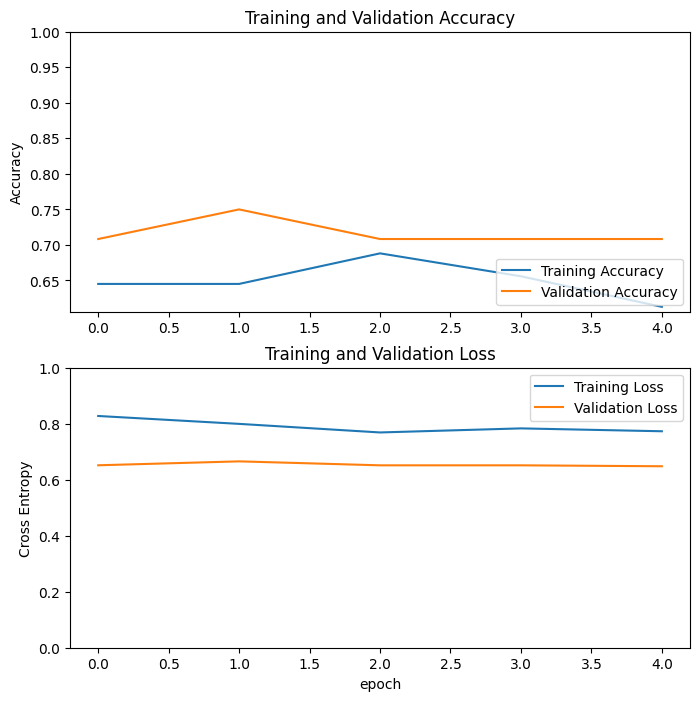

In [ ]:
# Kurva belajar
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Langkah 8: Prediksi pada Data Baru
# Prediksi label untuk data baru
# Tokenisasi data tweet baru
new_tweets = tweet_text.tolist()
new_inputs = tokenizer(new_tweets, padding=True, truncation=True, max_length=max_length, return_tensors="tf")

# Membuat prediksi
predictions = model.predict(new_inputs['input_ids'])
predicted_labels = tf.argmax(predictions.logits, axis=-1).numpy()

# Mapping label ke nama kelas
label_mapping = {0: "negatif", 1: "positif", 2: "netral"}

98/98 [==============================] - 658s 7s/step


In [ ]:
# menampilkan label prediksi untuk tweet baru
print(predicted_labels)  # 0 untuk negatif, 1 untuk positif, 2 untuk netral

[0 0 0 ... 0 2 0]


In [ ]:
# Menyatukan hasil predicted_tabel dengan membuat variabel label pada data tweet_text
tweet_text = tweet_text.to_frame()
tweet_text['label'] = predicted_labels

# melihat sebagian data
tweet_text.head()

,full_text,label
25,teroris apartheid zionis israel bunuh perempuan anakanak dosa palestina atur atur nyaman dunia munafik colok,0
57,selebrasi pr cari suaka palestina kamp ungsi yunani serang hamas israel mereka knapa ngungsi ninggalin palestina suaka negara nonmuslim ruwet,0
81,breaking jahat perang israel benjamin netanyahu seru warga palestina gaza pergi militer israel ubah sembunyi hamas puingpuing israel pergi,0
155,teriak palestina teroris hamas teroris orangorang tindas lawan teriak israel teroris jahat wanita anak palestina,0
459,pilu warga gaza serang israel tunawisma lahir,2


In [ ]:
# Hitung jumlah setiap sentimen
sentimen_counts = tweet_text['label'].value_counts()

# Tampilkan hasilnya
print(sentimen_counts)

label
0    1996
2    1115
Name: count, dtype: int64


In [ ]:
# Langkah 9: Menyimpan Model (Opsional)
# Menyimpan model untuk penggunaan di masa depan
model.save_pretrained("path_to_save_model")
tokenizer.save_pretrained("path_to_save_model")

('path_to_save_model/tokenizer_config.json',
 'path_to_save_model/special_tokens_map.json',
 'path_to_save_model/vocab.txt',
 'path_to_save_model/added_tokens.json',
 'path_to_save_model/tokenizer.json')

shape: (3111, 2)
label
0    1996
2    1115
Name: count, dtype: int64



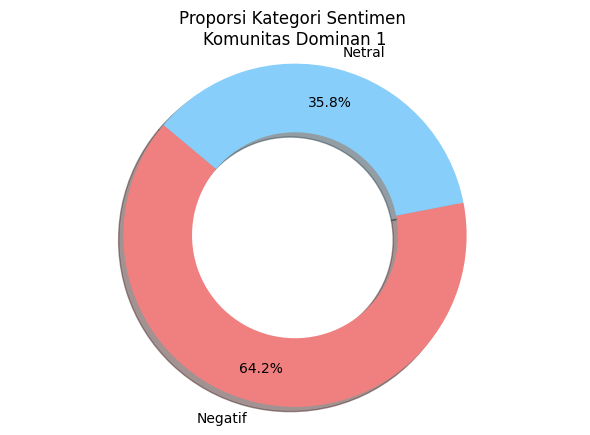

In [ ]:
# Langkah 10: Membuat visualisasi hasil
# Fungsi untuk membuat donut chart
def donut(sizes, ax, angle=90, labels=None, colors=None, explode=None, shadow=None):
    # Plot
    ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
           startangle=angle, pctdistance=0.8, explode=explode,
           wedgeprops=dict(width=0.4), shadow=shadow)

    # Formatting
    plt.axis('equal') # plt is defined below, so this line will work
    plt.tight_layout()

# Plot arguments
sizes = tweet_text.label.value_counts()

# Adjust the labels to match the number of unique labels in your data
# The original code was missing a label and had one too many colors and explode values
labels = ['Negatif', 'Netral'] #, 'Positif'
colors = ['lightcoral', 'lightskyblue'] #, 'lightgreen'
explode = (0, 0) #, 0

# import the module providing plt
import matplotlib.pyplot as plt

# Create axes
fig, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 140, labels, colors=colors, explode=explode, shadow=True)
ax.set_title('Proporsi Kategori Sentimen \nKomunitas Dominan 1')

print(f'shape: {tweet_text.shape}')
df_count = tweet_text.label.value_counts()
print(df_count)
print('')
plt.show()

## <center><font color="pink">!!! Analisis Sentimen IndoBERT !!!</font></center>
Pakai model yg disimpan

In [ ]:
# Langkah pertama: Import library yang dibutuhkan
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Tentukan path di mana model dan tokenizer diupload
model_path = "/content/drive/MyDrive/My Script/Script/model/model73"

In [ ]:
# Langkah kedua: Load model yang telah disimpan dalam format .h5
# (Pastikan bahwa file `tf_model.h5` ada di dalam folder tersebut)
model = TFBertForSequenceClassification.from_pretrained(model_path, from_pt=False)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/My Script/Script/model/model73.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
# Langkah ketiga: Load tokenizer yang telah disimpan
# (Pastikan bahwa folder tokenizer berisi file tokenizer)
tokenizer = BertTokenizer.from_pretrained(model_path)

In [ ]:
# Langkah 8: Prediksi pada Data Baru
# Prediksi label untuk data baru
# Tokenisasi data tweet baru
new_tweets = tweet_text.tolist()
new_inputs = tokenizer(new_tweets, padding=True, truncation=True, max_length=128, return_tensors="tf")

# Membuat prediksi
predictions = model.predict(new_inputs['input_ids'])
predicted_labels = tf.argmax(predictions.logits, axis=-1).numpy()

# Mapping label ke nama kelas
label_mapping = {0: "negatif", 1: "positif", 2: "netral"}

98/98 [==============================] - 699s 7s/step


In [ ]:
# menampilkan label prediksi untuk tweet baru
print(predicted_labels)  # 0 untuk negatif, 1 untuk positif, 2 untuk netral

[0 0 0 ... 0 2 0]


In [ ]:
# Menyatukan hasil predicted_tabel dengan membuat variabel label pada data tweet_text
tweet_text = tweet_text.to_frame()
tweet_text['label'] = predicted_labels

# melihat sebagian data
tweet_text.head()

,full_text,label
25,teroris apartheid zionis israel bunuh perempua...,0
57,selebrasi pr cari suaka palestina kamp ungsi y...,0
81,breaking jahat perang israel benjamin netanyah...,0
155,teriak palestina teroris hamas teroris orangor...,0
459,pilu warga gaza serang israel tunawisma lahir,2


In [ ]:
# Hitung jumlah setiap sentimen
sentimen_counts = tweet_text['label'].value_counts()

# Tampilkan hasilnya
print(sentimen_counts)

label
0    1996
2    1115
Name: count, dtype: int64


# <center><font color="pink">**Komunitas dominan 2 (Cluster-1)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 2 (Cluster-1)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 1
cluster_1 = df_leiden[df_leiden['Cluster'] == 1][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 1

# Menyimpan jumlah user cluster 1 ke dalam variabel jumlah_id_cluster_1
jumlah_id_cluster_1 = len(cluster_1['Id'].unique())
# Melihat jumlah user cluster 1
print(f"Jumlah user pada Cluster 1 ada sebanyak {jumlah_id_cluster_1} user.")

# Menyimpan nama-nama user cluster 1 ke dalam variabel cluster_1_id
cluster_1_id = cluster_1['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 1
print(cluster_1_id)

Jumlah user pada Cluster 1 ada sebanyak 45 user.

Berikut adalah nama user-usernya:
['Ndons_Back' 'prabowo' 'tvOneNews' 'bengkeldodo' 'Reivolusi'
 'mickolv_idas' 'aniesbaswedan' 'jogjaplaza' 'gibran_tweet' 'Fahrihamzah'
 'Kimberley_2024' 'Panglima6789' 'wachyumkiji' 'kurawa' 'ruyasagit900'
 'Gojokaisen86' 'are_inismyname' 'AndreasSolusi' 'P4P4B0W0_2024'
 'florieliciouss' 'Bank_Joee_' '99propaganda' 'EN538474N6' 'seeksixsuck'
 'zarryhendrik' 'Afgan772' 'BANGSAygSUJUD' 'dionsumir' 'paradox_2020'
 'IrawanRommi' 'isaansori156249' 'blackangler3' 'eowyn_targaryen'
 'namchanis' 'LaskarGAZA' 'BFbu88' 'dimaz_gaza' 'PJumadi3' 'nurcahya23264'
 'B1516EFG' '1231_rina' 'lokiluki583' 'IntanNuraini091' 'gwgituloooh'
 'Kimberley_PS08']


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_1_id
df_cluster_1 = df_baru[df_baru['username'].isin(cluster_1_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_1 = df_cluster_1['full_text']

df_tweet_cluster_1.head()

,full_text
27,@rahmatsn Tapi prabowo latih pasukan hamas loh...
322,Tuhan kasih otak buat Berfikir Agama sudah mem...
337,@abu_waras Trus kalau gitu survey nya di mana ?
456,@GanRusdi @Gladislagiwoy Brigade AlQasam Pales...
1046,waduh rumitz ini


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_1 = df_tweet_cluster_1.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_1.head()

,full_text
27,@rahmatsn tapi prabowo latih pasukan hamas loh...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,@abu_waras trus kalau gitu survey nya di mana ?
456,@ganrusdi @gladislagiwoy brigade alqasam pales...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned1
df_cleaned1 = df_tweet_cluster_1.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned1.head()

,full_text
27,tapi prabowo latih pasukan hamas loh abu janda...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,trus kalau gitu survey nya di mana
456,brigade alqasam palestine berhasil masuk ke ma...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned1
df_tokens1 = df_cleaned1.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens1.head()

,full_text
27,"[tapi, prabowo, latih, pasukan, hamas, loh, ab..."
322,"[tuhan, kasih, otak, buat, berfikir, agama, su..."
337,"[trus, kalau, gitu, survey, nya, di, mana]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,"[waduh, rumitz, ini]"


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens1
df_tokens_sw1 = df_tokens1.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw1.head()

,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[trus, gitu, survey]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens1
df_tokens_norm1 = df_tokens_sw1.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm1.head()

,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm1:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2748


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed1 = df_tokens_norm1.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed1.head()

,full_text
27,"[prabowo, latih, pasu, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntut, ..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, hasil, masuk, ma..."
1046,[rumitz]


In [ ]:
# Menjalankan fungsi joining pada data df_tokens_stemmed
tweet_text1 = df_tokens_stemmed1.apply(lambda x: joining(x))
# Melihat sedikit bagian atas data
tweet_text1.head()

,full_text
27,prabowo latih pasu hamas abu janda mah
322,tuhan kasih otak berfikir agama tuntut pilih p...
337,terus begitu survei
456,brigade alqasam palestine hasil masuk markas z...
1046,rumitz


## <center><font color="pink">Analisis Sentimen IndoBERT</font></center>

In [ ]:
# Prediksi label untuk data baru
# Tokenisasi data tweet baru
new_tweets1 = tweet_text1.tolist()
new_inputs1 = tokenizer(new_tweets1, padding=True, truncation=True, max_length=128, return_tensors="tf")

# Membuat prediksi
predictions1 = model.predict(new_inputs1['input_ids'])
predicted_labels1 = tf.argmax(predictions1.logits, axis=-1).numpy()

# Mapping label ke nama kelas
label_mapping = {0: "negatif", 1: "positif", 2: "netral"}

21/21 [==============================] - 134s 6s/step


In [ ]:
# menampilkan label prediksi untuk tweet baru
print(predicted_labels1)  # 0 untuk negatif, 1 untuk positif, 2 untuk netral

[2 0 0 0 2 2 0 2 0 2 2 2 2 0 0 2 0 2 2 0 0 2 2 2 0 0 2 0 0 2 2 0 2 0 0 2 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0
 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 0 2 0 2 0 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 2
 0 0 0 2 2 2 0 0 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 0 0 0 0 0 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 0 0 2 0 2 2 2 2 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0
 0 0 2 2 2 2 0 1 2 2 0 0 0 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 2 0 0 2 2 2 0
 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0
 2 0 0 2 0 0 2 0 2 2 2 0 2 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2
 2 2 0 0 2 0 0 0 2 2 2 2 2 2 0 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2
 0 2 2 2 0 2 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 0 2 0 0 2 2 2 0 0
 2 0 2 0 0 2 2 0 2 0 0 2 0 2 2 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 2 2 0 2 2 2
 0 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 2 0 2 0 0 2 0 0
 2 0 0 0 0 0 2 0 2 0 2 0 

In [ ]:
# Menyatukan hasil predicted_tabel dengan membuat variabel label pada data tweet_text
tweet_text1 = tweet_text1.to_frame()
tweet_text1['label'] = predicted_labels1

# melihat sebagian data
tweet_text1.head()

,full_text,label
27,prabowo latih pasu hamas abu janda mah,2
322,tuhan kasih otak berfikir agama tuntut pilih p...,0
337,terus begitu survei,0
456,brigade alqasam palestine hasil masuk markas z...,0
1046,rumitz,2


In [ ]:
# Hitung jumlah setiap sentimen
sentimen_counts = tweet_text1['label'].value_counts()

# Tampilkan hasilnya
print(sentimen_counts)

label
0    372
2    268
1      1
Name: count, dtype: int64


shape: (641, 2)
label
0    372
2    268
1      1
Name: count, dtype: int64



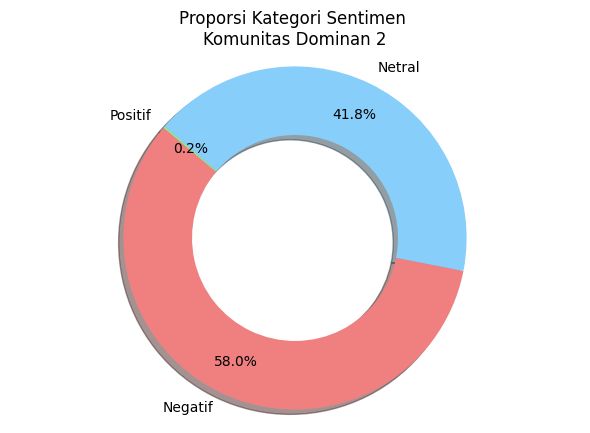

In [ ]:
# Membuat visualisasi hasil

# Plot arguments
sizes = tweet_text1.label.value_counts()

# Adjust the labels to match the number of unique labels in your data
# The original code was missing a label and had one too many colors and explode values
labels = ['Negatif', 'Netral', 'Positif']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0, 0, 0)

# import the module providing plt
import matplotlib.pyplot as plt

# Create axes
fig, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 140, labels, colors=colors, explode=explode, shadow=True)
ax.set_title('Proporsi Kategori Sentimen \nKomunitas Dominan 2')

print(f'shape: {tweet_text1.shape}')
df_count = tweet_text1.label.value_counts()
print(df_count)
print('')
plt.show()

# <center><font color="pink">**Komunitas dominan 3 (Cluster-2)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 3 (Cluster-2)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 2
cluster_2 = df_leiden[df_leiden['Cluster'] == 2][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 2

# Menyimpan jumlah user cluster 2 ke dalam variabel jumlah_id_cluster_2
jumlah_id_cluster_2 = len(cluster_2['Id'].unique())
# Melihat jumlah user cluster 2
print(f"Jumlah user pada Cluster 2 ada sebanyak {jumlah_id_cluster_2} user.")

# Menyimpan nama-nama user cluster 2 ke dalam variabel cluster_2_id
cluster_2_id = cluster_2['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 2
print(cluster_2_id)

Jumlah user pada Cluster 2 ada sebanyak 33 user.

Berikut adalah nama user-usernya:
['bnsphrxyz' 'LoudMinorities' 'antikadrunbang' 'DeHoutman_id'
 'alfatih212426' 'SammiSoh' 'AyaniMel' 'Kappa_2023' 'asasfuro' 'JinNonik'
 'JokoPintar2' 'aesculapiusw' 'incognito_grey' 'Amox1L1N' '__anomali__'
 'Wisnuhid' 'ridho45916919' 'ajegilelu1' 'AsbabulKop51425' 'MarioInferno'
 'JLion555' 'HabanglaliK' 'Froyo64' 'Apokrifa23' 'Balistta'
 'AnakBawang_0705' 'MinminCha94972' 'fmn99_gaming' 'johnhomebapa'
 'ScioCogitoCredo' 'imamDouma' 'eeh_ito' 'anarchyhumanist']


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_2_id
df_cluster_2 = df_baru[df_baru['username'].isin(cluster_2_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_2 = df_cluster_2['full_text']

df_tweet_cluster_2.head()

,full_text
143,Yup Yg lebih tragic n lebih hina itu kita diam...
470,Ini pengecutnya teroris Hamas. Saat mereka mem...
919,@zoelfick Seharusnya pejuang Hamas cari medan ...
1239,@PribadiBales @LonenyDragon @Amran_bin_Ali @Wa...
1264,Tukang hoax @bnsphrxyz yg mnghina hukum Taurat...


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_2 = df_tweet_cluster_2.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_2.head()

,full_text
143,yup yg lebih tragic n lebih hina itu kita diam...
470,ini pengecutnya teroris hamas. saat mereka mem...
919,@zoelfick seharusnya pejuang hamas cari medan ...
1239,@pribadibales @lonenydragon @amran_bin_ali @wa...
1264,tukang hoax @bnsphrxyz yg mnghina hukum taurat...


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned2
df_cleaned2 = df_tweet_cluster_2.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned2.head()

,full_text
143,yup yg lebih tragic lebih hina itu kita diam ...
470,ini pengecutnya teroris hamas saat mereka memb...
919,seharusnya pejuang hamas cari medan perang kur...
1239,
1264,tukang hoax yg mnghina hukum taurat ini berusa...


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned2
df_tokens2 = df_cleaned2.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens2.head()

,full_text
143,"[yup, yg, lebih, tragic, lebih, hina, itu, kit..."
470,"[ini, pengecutnya, teroris, hamas, saat, merek..."
919,"[seharusnya, pejuang, hamas, cari, medan, pera..."
1239,[]
1264,"[tukang, hoax, yg, mnghina, hukum, taurat, ini..."


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens2
df_tokens_sw2 = df_tokens2.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw2.head()

,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, hoax, mnghina, hukum, taurat, berusah..."


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens2
df_tokens_norm2 = df_tokens_sw2.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm2.head()

,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, bohong, mnghina, hukum, taurat, berus..."


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm2:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2284


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens2
df_tokens_stemmed2 = df_tokens_norm2.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed2.head()

,full_text
143,"[yup, tragic, hina, diam, biar, biadab, kejam,..."
470,"[kecut, teroris, hamas, bordir, israel, pakai,..."
919,"[juang, hamas, cari, medan, perang, kurusetra,..."
1239,[]
1264,"[tukang, bohong, mnghina, hukum, taurat, usaha..."


In [ ]:
# Menjalankan fungsi joining pada data df_tokens_stemmed
tweet_text2 = df_tokens_stemmed2.apply(lambda x: joining(x))
# Melihat sedikit bagian atas data
tweet_text2.head()

,full_text
143,yup tragic hina diam biar biadab kejam israel
470,kecut teroris hamas bordir israel pakai rudal ...
919,juang hamas cari medan perang kurusetra duel j...
1239,
1264,tukang bohong mnghina hukum taurat usaha tutup...


## <center><font color="pink">Analisis Sentimen IndoBERT</font></center>

In [ ]:
# Prediksi label untuk data baru
# Tokenisasi data tweet baru
new_tweets2 = tweet_text2.tolist()
new_inputs2 = tokenizer(new_tweets2, padding=True, truncation=True, max_length=128, return_tensors="tf")

# Membuat prediksi
predictions2 = model.predict(new_inputs2['input_ids'])
predicted_labels2 = tf.argmax(predictions2.logits, axis=-1).numpy()

# Mapping label ke nama kelas
label_mapping = {0: "negatif", 1: "positif", 2: "netral"}

13/13 [==============================] - 69s 5s/step


In [ ]:
# menampilkan label prediksi untuk tweet baru
print(predicted_labels2)  # 0 untuk negatif, 1 untuk positif, 2 untuk netral

[0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0
 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 2 0 0 2 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0]


In [ ]:
# Menyatukan hasil predicted_tabel dengan membuat variabel label pada data tweet_text
tweet_text2 = tweet_text2.to_frame()
tweet_text2['label'] = predicted_labels2

# melihat sebagian data
tweet_text2.head()

,full_text,label
143,yup tragic hina diam biar biadab kejam israel,0
470,kecut teroris hamas bordir israel pakai rudal ...,0
919,juang hamas cari medan perang kurusetra duel j...,0
1239,,2
1264,tukang bohong mnghina hukum taurat usaha tutup...,0


In [ ]:
# Hitung jumlah setiap sentimen
sentimen_counts = tweet_text2['label'].value_counts()

# Tampilkan hasilnya
print(sentimen_counts)

label
0    330
2     59
Name: count, dtype: int64


shape: (389, 2)
label
0    330
2     59
Name: count, dtype: int64



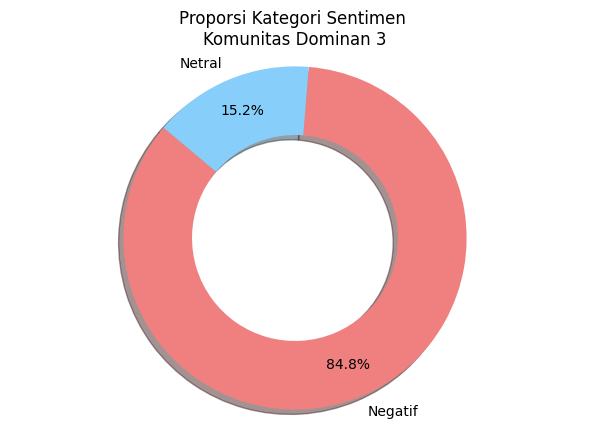

In [ ]:
# Membuat visualisasi hasil

# Plot arguments
sizes = tweet_text2.label.value_counts()

# Adjust the labels to match the number of unique labels in your data
# The original code was missing a label and had one too many colors and explode values
labels = ['Negatif', 'Netral'] #, 'Positif'
colors = ['lightcoral', 'lightskyblue'] #, 'lightgreen'
explode = (0, 0) #, 0

# import the module providing plt
import matplotlib.pyplot as plt

# Create axes
fig, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 140, labels, colors=colors, explode=explode, shadow=True)
ax.set_title('Proporsi Kategori Sentimen \nKomunitas Dominan 3')

print(f'shape: {tweet_text2.shape}')
df_count = tweet_text2.label.value_counts()
print(df_count)
print('')
plt.show()

# <center><font color="pink">**Visualisasi**</font></center>
Menggunakan Diagram Bar Berkelompok

In [ ]:
# Tambahkan kolom 'Komunitas' ke setiap DataFrame
tweet_text['Komunitas Dominan'] = '1'
tweet_text1['Komunitas Dominan'] = '2'
tweet_text2['Komunitas Dominan'] = '3'

# Gabungkan ketiga DataFrame menjadi satu
combined_df = pd.concat([tweet_text, tweet_text1, tweet_text2], ignore_index=True)

# Tampilkan beberapa baris dari DataFrame gabungan
combined_df.head()

,full_text,label,Komunitas Dominan
0,teroris apartheid zionis israel bunuh perempua...,0,1
1,selebrasi pr cari suaka palestina kamp ungsi y...,0,1
2,breaking jahat perang israel benjamin netanyah...,0,1
3,teriak palestina teroris hamas teroris orangor...,0,1
4,pilu warga gaza serang israel tunawisma lahir,2,1


In [ ]:
combined_df = combined_df[['label', 'Komunitas Dominan']]

# Mengganti label sentimen angka ke deskripsi
combined_df['label'] = combined_df['label'].map({0: 'Negatif', 1: 'Positif', 2: 'Netral'})

# Menampilkan DataFrame yang sudah diubah
combined_df.head()

<ipython-input-88-4b515280dd84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['label'] = combined_df['label'].map({0: 'Negatif', 1: 'Positif', 2: 'Netral'})


,label,Komunitas Dominan
0,Negatif,1
1,Negatif,1
2,Negatif,1
3,Negatif,1
4,Netral,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

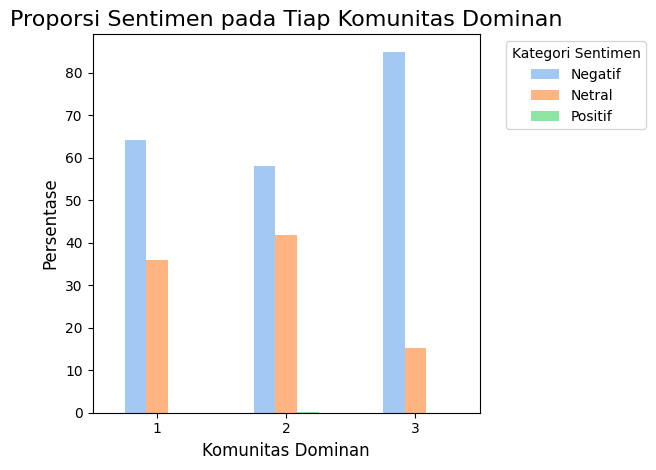

In [ ]:
# Menghitung jumlah total tiap sentimen (label) dalam tiap komunitas
sentiment_count = combined_df.groupby(['Komunitas Dominan', 'label']).size().unstack(fill_value=0)

# Menghitung persentase sentimen dalam tiap komunitas
sentiment_percentage = sentiment_count.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Set warna pastel menggunakan seaborn
pastel_colors = sns.color_palette("pastel")

# Plotting Clustered Bar dengan warna pastel
plt.figure(figsize=(10, 6))
sentiment_percentage.plot(kind='bar', stacked=False, color=pastel_colors)

# Menambahkan detail pada plot
plt.title("Proporsi Sentimen pada Tiap Komunitas Dominan", fontsize=16)
plt.ylabel("Persentase", fontsize=12)
plt.xlabel("Komunitas Dominan", fontsize=12)
plt.xticks(rotation=0)

# Menampilkan legend di luar plot
plt.legend(title="Kategori Sentimen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Menampilkan plot
plt.show()

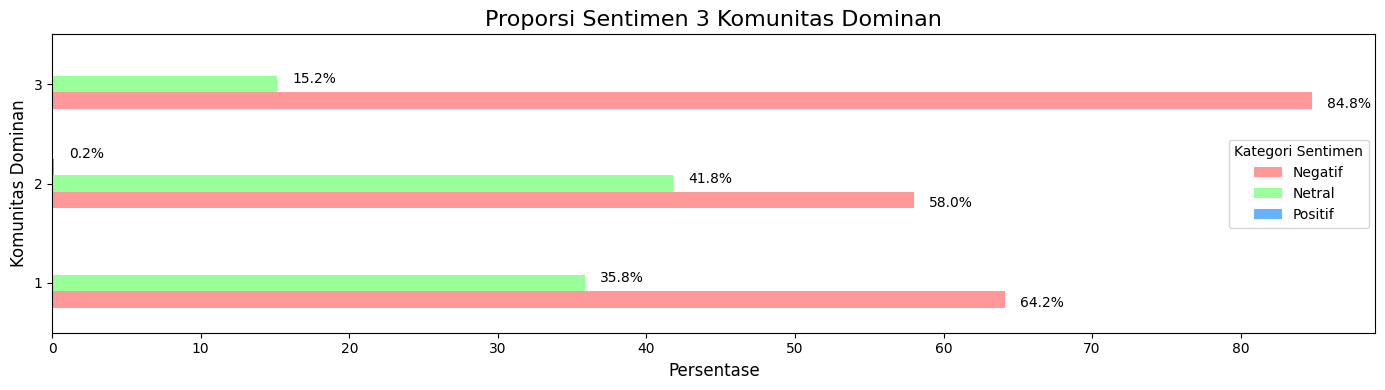

In [ ]:
# Menghitung persentase tiap label (sentimen) di setiap komunitas
percentage_df = combined_df.groupby(['Komunitas Dominan', 'label']).size().unstack(fill_value=0)
percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0) * 100

# Mengganti label dengan kategori sentimen yang sesuai
percentage_df.columns = ['Negatif', 'Netral', 'Positif']

# Plot bar horizontal
fig, ax = plt.subplots(figsize=(14, 4))

# Menggunakan warna pastel
colors = ['#FF9999', '#99FF99', '#66B2FF']

percentage_df.plot(kind='barh', stacked=False, color=colors, ax=ax)

# Menambahkan persentase di ujung setiap bar
for i in range(len(percentage_df)):
    for j in range(len(percentage_df.columns)):
        percentage = percentage_df.iloc[i, j]
        if percentage > 0:  # Hanya menampilkan jika persentase > 0
            ax.text(percentage + 1, i - 0.2 + j * 0.25, f'{percentage:.1f}%', color='black', va='center')

# Memberi label dan judul
ax.set_xlabel('Persentase', fontsize=12)
ax.set_title("Proporsi Sentimen 3 Komunitas Dominan", fontsize=16)
ax.set_ylabel('Komunitas Dominan', fontsize=12)
ax.set_yticklabels(['1', '2', '3'])

# Menampilkan legend
ax.legend(title='Kategori Sentimen', loc='center right')

plt.tight_layout()
plt.show()